In [1]:
import pandas as pd
dataset = pd.read_csv('hate_speech.csv') 
dataset.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
dataset.shape

(5242, 3)

In [5]:
dataset.label.value_counts()

label
0    3000
1    2242
Name: count, dtype: int64

In [7]:
for index, tweet in enumerate(dataset["tweet"][10:15]):

    print(index+1,"-",tweet)

1 -  â #ireland consumer price index (mom) climbed from previous 0.2% to 0.5% in may   #blog #silver #gold #forex
2 - we are so selfish. #orlando #standwithorlando #pulseshooting #orlandoshooting #biggerproblems #selfish #heabreaking   #values #love #
3 - i get to see my daddy today!!   #80days #gettingfed
4 - ouch...junior is angryð#got7 #junior #yugyoem   #omg 
5 - i am thankful for having a paner. #thankful #positive     


In [9]:
import re

def clean_text(text):


    text = re.sub(r'[^a-zA-Z\']', ' ', text)

    text = re.sub(r'[^\x00-\x7F]+', ' ', text)

    text = text.lower()  
    return text

In [11]:
dataset['clean_text'] = dataset.tweet.apply(lambda x: clean_text(x))

In [13]:
dataset.head(10)

,id,label,tweet,clean_text
0,1,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i can't us...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now motivation
5,6,0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...,user camping tomorrow user user user use...
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...,user user welcome here i'm it's so gr...


In [15]:
from nltk.corpus import stopwords

# listing stop words

len(stopwords.words('english'))

179

In [17]:
stop_words = [
    'a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', 
    'aren\'t', 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 
    'both', 'but', 'by', 'can\'t', 'cannot', 'could', 'couldn\'t', 'did', 'didn\'t', 'do', 
    'does', 'doesn\'t', 'doing', 'don\'t', 'down', 'during', 'each', 'few', 'for', 'from', 
    'further', 'had', 'hadn\'t', 'has', 'hasn\'t', 'have', 'haven\'t', 'having', 'he', 'he\'d', 
    'he\'ll', 'he\'s', 'her', 'here', 'here\'s', 'hers', 'herself', 'him', 'himself', 'his', 
    'how', 'how\'s', 'i', 'i\'d', 'i\'ll', 'i\'m', 'i\'ve', 'if', 'in', 'into', 'is', 'isn\'t', 
    'it', 'it\'s', 'its', 'itself', 'let\'s', 'me', 'more', 'most', 'mustn\'t', 'my', 'myself', 
    'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 
    'ours', 'ourselves', 'out', 'over', 'own', 'same', 'shan\'t', 'she', 'she\'d', 'she\'ll', 
    'she\'s', 'should', 'shouldn\'t', 'so', 'some', 'such', 'than', 'that', 'that\'s', 'the', 
    'their', 'theirs', 'them', 'themselves', 'then', 'there', 'there\'s', 'these', 'they', 
    'they\'d', 'they\'ll', 'they\'re', 'they\'ve', 'this', 'those', 'through', 'to', 'too', 
    'under', 'until', 'up', 'very', 'was', 'wasn\'t', 'we', 'we\'d', 'we\'ll', 'we\'re', 
    'we\'ve', 'were', 'weren\'t', 'what', 'what\'s', 'when', 'when\'s', 'where', 'where\'s', 
    'which', 'while', 'who', 'who\'s', 'whom', 'why', 'why\'s', 'with', 'won\'t', 'would', 
    'wouldn\'t', 'you', 'you\'d', 'you\'ll', 'you\'re', 'you\'ve', 'your', 'yours', 
    'yourself', 'yourselves'
]


In [19]:
#Generate word frequency

def gen_freq(text):

    #Will store the list of words

    word_list = []

    #Loop over all the tweets and extract words into word_list

    for tw_words in text.split():

        word_list.extend(tw_words)

    #Create word frequencies using word_list

    word_freq = pd.Series(word_list).value_counts()

    #Drop the stopwords during the frequency calculation

    word_freq = word_freq.drop(stop_words, errors='ignore')

    return word_freq

In [21]:
#Check whether a negation term is present in the text

def any_neg(stop_words):

    for word in stop_words:

        if word in ['n', 'no', 'non', 'not'] or re.search(r"\wn't", word):

            return 1

        else:

            return 0

In [23]:
#Check whether one of the 100 rare words is present in the text

def any_rare(stop_words, rare_100):

    for word in stop_words:

        if word in rare_100:

            return 1

        else:

            return 0

In [25]:
#Check whether prompt words are present

def is_question(stop_words):

    for word in stop_words:

        if word in ['when', 'what', 'how', 'why', 'who', 'where']:

            return 1

        else:

            return 0

In [27]:
word_freq = gen_freq(dataset.clean_text.str)

#100 most rare words in the dataset

rare_100 = word_freq[-100:] # last 100 rows/words

#Number of words in a tweet

dataset['word_count'] = dataset.clean_text.str.split().apply(lambda x: len(x))

#Negation present or not

dataset['any_neg'] = dataset.clean_text.str.split().apply(lambda x: any_neg(x))

#Prompt present or not

dataset['is_question'] = dataset.clean_text.str.split().apply(lambda x: is_question(x))

#Any of the most 100 rare words present or not

dataset['any_rare'] = dataset.clean_text.str.split().apply(lambda x: any_rare(x, rare_100))

#Character count of the tweet

dataset['char_count'] = dataset.clean_text.apply(lambda x: len(x))

In [29]:
dataset.head(10)

,id,label,tweet,clean_text,word_count,any_neg,is_question,any_rare,char_count
0,1,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is s...,18,0,0,0,102
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i can't us...,19,0,0,0,122
2,3,0,bihday your majesty,bihday your majesty,3,0,0,0,21
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ...,12,0,0,0,86
4,5,0,factsguide: society now #motivation,factsguide society now motivation,4,0,0,0,39
5,6,0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...,18,0,0,0,116
6,7,0,@user camping tomorrow @user @user @user @use...,user camping tomorrow user user user use...,11,0,0,0,74
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams ...,20,0,0,0,143
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champ...,10,0,0,0,87
9,10,0,@user @user welcome here ! i'm it's so #gr...,user user welcome here i'm it's so gr...,8,0,0,0,50


In [31]:

from sklearn.model_selection import train_test_split

 

X = dataset[['word_count', 'any_neg', 'any_rare', 'char_count', 'is_question']]

y = dataset.label

 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 

                                                    random_state=0)

In [35]:
from sklearn.naive_bayes import GaussianNB

 

#Initialize GaussianNB classifier

model = GaussianNB()

#Fit the model on the train dataset

model = model.fit(X_train, y_train)

#Make predictions on the test dataset

pred = model.predict(X_test)

In [39]:
model.predict(X_test[5:10])

array([0, 1, 1, 1, 1], dtype=int64)

In [43]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, pred)*100, "%")

Accuracy: 42.99332697807436 %


In [45]:
from sklearn.ensemble import RandomForestClassifier

#Create a random forest classifier, 100 trees

clf_rf=RandomForestClassifier()

 

#Train the model using the training sets

clf_rf.fit(X_train,y_train)

 

rf_pred=clf_rf.predict(X_test).astype(int)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, \
accuracy_score

print(confusion_matrix(y_test,rf_pred))  

print(classification_report(y_test,rf_pred))  

print("Accuracy:",accuracy_score(y_test, rf_pred))







[[407 192]
 [239 211]]
              precision    recall  f1-score   support

           0       0.63      0.68      0.65       599
           1       0.52      0.47      0.49       450

    accuracy                           0.59      1049
   macro avg       0.58      0.57      0.57      1049
weighted avg       0.58      0.59      0.59      1049

Accuracy: 0.5891325071496664


In [57]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(class_weight='balanced') 

logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [61]:
y_pred = logreg.predict(X_test) #predicting the values

In [67]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.58      0.61       599
           1       0.49      0.54      0.52       450

    accuracy                           0.57      1049
   macro avg       0.56      0.56      0.56      1049
weighted avg       0.57      0.57      0.57      1049



C:\Users\tirur\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tirur\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tirur\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


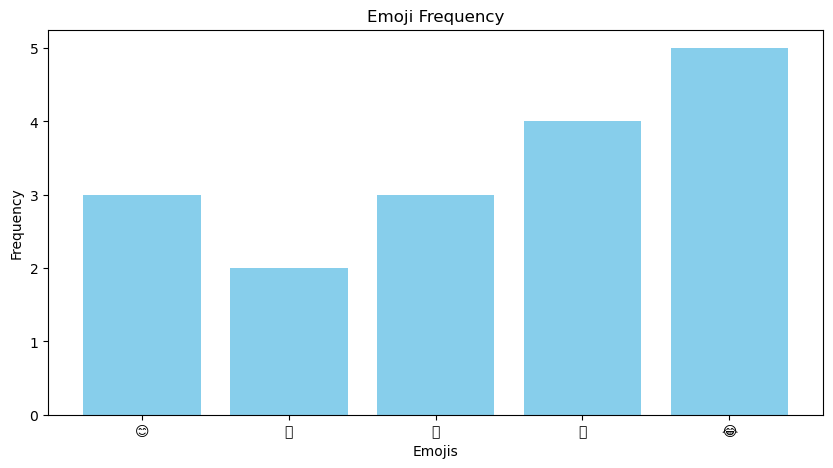

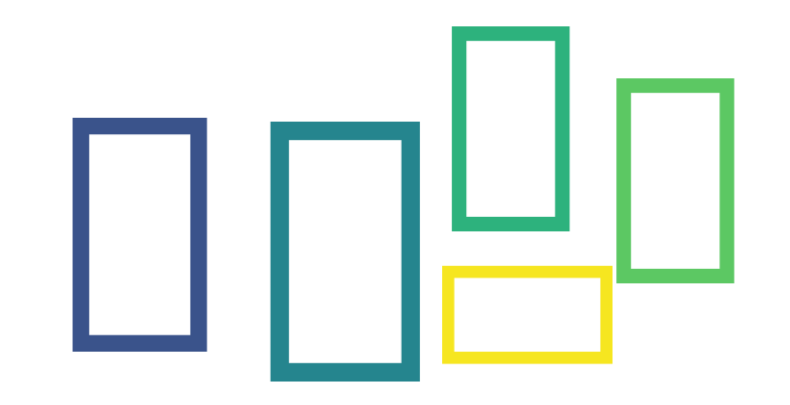

In [69]:
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud


def extract_emojis(text):
    emoji_pattern = re.compile(r"[\U0001F600-\U0001F64F]|[\U0001F300-\U0001F5FF]|[\U0001F680-\U0001F6FF]|[\U0001F700-\U0001F77F]|[\U0001F780-\U0001F7FF]|[\U0001F800-\U0001F8FF]|[\U0001F900-\U0001F9FF]|[\U0001FA00-\U0001FA6F]|[\U0001FA70-\U0001FAFF]|[\U00002702-\U000027B0]|[\U000024C2-\U0001F251]", flags=re.UNICODE)
    return emoji_pattern.findall(text)


def visualize_emoji_frequency(text):
    emojis = extract_emojis(text)
    emoji_counts = Counter(emojis)
    
    if not emoji_counts:
        print("No emojis found in the text.")
        return
    
    # Create bar chart
    plt.figure(figsize=(10, 5))
    plt.bar(emoji_counts.keys(), emoji_counts.values(), color='skyblue')
    plt.xlabel('Emojis')
    plt.ylabel('Frequency')
    plt.title('Emoji Frequency')
    plt.show()
    
   
    wordcloud = WordCloud(font_path=None, width=800, height=400, background_color='white').generate_from_frequencies(emoji_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


text = "😊🎉🎉🚀🚀🚀👍👍👍👍😊😊😂😂😂😂😂"
visualize_emoji_frequency(text)


In [ ]:
Write a Python function that takes a string as input and extracts all the emojis present in the text and create a bar chart or word cloud showing the frequency of each emoji.